# MCMC simulation of Surgical failures

# Imports

In [2]:
%matplotlib inline
from pymc3 import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [5]:
hours = np.array([5, 1, 5, 14, 3, 19, 1, 1, 4, 22])
failures = np.array([94.32, 15.72, 62.88, 125.76, 5.24, 31.44, 1.048, 1.048, 2.096, 10.48])

## Specify models

The above data contains the number of failures, of n = 10 pumps in operation periods measured in thousands of hours. The pumps are from several systems in the nuclear plant Farley 1 in the U.K. Pumps 1, 3, 4 and 6 operate continuously, while the rest operate intermittently or on standby.

Suppose that the rate of failure of the ith pump per unit time is $\lambda_i$.

$$failures \sim Poisson(hours*\lambda_i)$$

If we suppose that the failure rates of each pump are similar, we can specify the $\lambda_i$ as
independent realisations from a $Gamma(\alpha,\beta)$ distribution, and that $\beta \sim Gamma(\tau,\phi)$.

In [45]:
with Model() as model: # model specifications

    # Priors
    beta1 = Gamma('beta', alpha = 0.1, beta = 1)
    lambd = Gamma('lambdas', alpha = 1.8, beta = beta1, shape=(1,10))
    bsd = Deterministic('bsd', np.sqrt(1.8)/beta1) # Std of the prior.

    # Likelihood
    Likelihood = Poisson('fail', mu=hours*lambd, observed=failures)
        
    start = find_MAP() # Find starting value by optimization
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(20000, step, start=start, progressbar=True, njobs=3) 
    # draw 20000 posterior samples, 3 chains.

Optimization terminated successfully.
         Current function value: 43.414393
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35


100%|██████████| 20000/20000 [00:43<00:00, 460.47it/s]


In [46]:
gelman_rubin(trace) # Probably converged

{'beta': 0.99998014845649341,
 'beta_log_': 0.99997721875280288,
 'bsd': 0.99997643794620106,
 'lambdas': array([[ 0.99999389,  0.99997729,  1.00001531,  0.99998407,  0.9999806 ,
          0.99997796,  0.9999938 ,  0.99997941,  1.00000092,  0.99998543]]),
 'lambdas_log_': array([[ 0.99999773,  0.99997849,  1.00001903,  0.99998551,  0.99998771,
          0.99998241,  0.99999072,  0.99997775,  0.99999479,  0.99998075]])}

In [47]:
var = ['lambdas', 'bsd']
df_summary(trace[1000:], varnames = var) # Burn in.

,mean,sd,mc_error,hpd_2.5,hpd_97.5
lambdas__0_0,18.116850,1.874897,0.006827,14.517751,21.819948
lambdas__0_1,13.063235,3.274160,0.010513,7.037605,19.559173
lambdas__0_2,12.060930,1.507994,0.005426,9.180874,15.047254
lambdas__0_3,8.871655,0.788776,0.002782,7.371278,10.457412
lambdas__0_4,2.065137,0.789995,0.002772,0.644798,3.595844
lambdas__0_5,1.701109,0.296461,0.000926,1.134866,2.282481
lambdas__0_6,2.172760,1.304197,0.005373,0.184957,4.737251
lambdas__0_7,2.176017,1.304573,0.005692,0.179903,4.718206
lambdas__0_8,0.884097,0.452549,0.001520,0.143819,1.773235
lambdas__0_9,0.528898,0.153060,0.000531,0.250505,0.832271


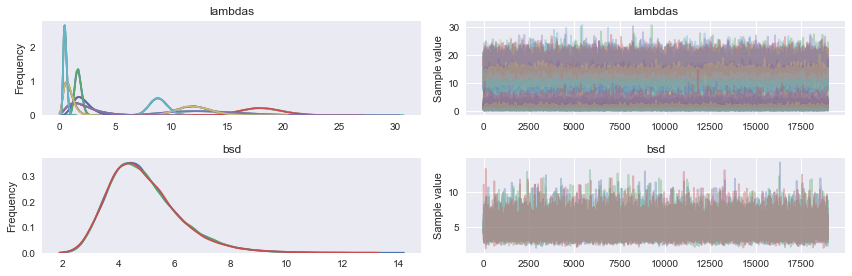

In [48]:
plt.figure(figsize=(2, 2))
traceplot(trace[1000:], varnames = var)
plt.tight_layout()

## With independent failure rates

In [33]:
with Model() as model: # model specifications

    # Priors
    lambd = Uniform('lambdas', lower=0, upper=1e6, shape=(1,10))

    # Likelihood
    Likelihood = Poisson('fail', mu=hours*lambd, observed=failures)
        
    start = find_MAP() # Find starting value by optimization
    step = NUTS(scaling=start) # Instantiate MCMC sampling algorithm
    trace = sample(20000, step, start=start, progressbar=True, njobs=3) 
    # draw 20000 posterior samples, 3 chains.

Optimization terminated successfully.
         Current function value: 148.642272
         Iterations: 174
         Function evaluations: 200
         Gradient evaluations: 192


100%|██████████| 20000/20000 [00:35<00:00, 566.91it/s]


In [34]:
gelman_rubin(trace) # Probably converged

{'lambdas': array([[ 0.99999265,  0.99998278,  0.99997606,  0.9999752 ,  0.9999921 ,
          1.00002724,  1.00003892,  0.9999884 ,  0.99998344,  1.00001959]]),
 'lambdas_interval_': array([[ 0.99999052,  0.99998695,  0.9999757 ,  0.99997505,  0.99998996,
          1.00002693,  1.00012831,  0.99999923,  0.99997579,  1.00008697]])}

In [35]:
df_summary(trace[1000:]) # Burn in.

,mean,sd,mc_error,hpd_2.5,hpd_97.5
lambdas__0_0,18.998106,1.955017,0.007250,15.208657,22.847483
lambdas__0_1,15.995213,3.972728,0.014213,8.503324,23.791620
lambdas__0_2,12.600819,1.588577,0.005710,9.579207,15.763066
lambdas__0_3,9.000317,0.800287,0.002685,7.466812,10.581773
lambdas__0_4,2.001704,0.819444,0.003133,0.603154,3.638790
lambdas__0_5,1.683725,0.296708,0.001036,1.112887,2.273915
lambdas__0_6,2.007862,1.417739,0.005172,0.076053,4.829781
lambdas__0_7,1.989978,1.404004,0.005627,0.043639,4.730204
lambdas__0_8,0.749886,0.434188,0.001557,0.067838,1.605127
lambdas__0_9,0.500240,0.149790,0.000556,0.229428,0.798854


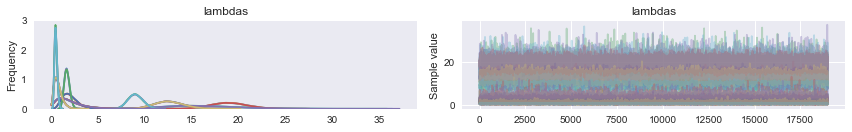

In [37]:
plt.figure(figsize=(3, 3))
traceplot(trace[1000:])
plt.tight_layout()

## Conclusions

The posterior densities are similar under both prior structures, although there are some differences. The differences are particularly striking for pumps 7, 8 and 9 which have only been operating for a short amount of time. This corresponds to a “small” amount of data for these pumps, compared to the others, and so their posteriors are more variable in the independent prior model. In the hierarchical model, because they have “borrowed strength” from the data in the other pumps, their resulting posterior distributions are consequently more precise. Note that the standard deviation of the hierarchical prior for the has clearly defined density at around 5, suggesting that there is indeed some similarity between the  i’s. This is consistent with the above findings.